# Montecarlo Lomb-Scargle

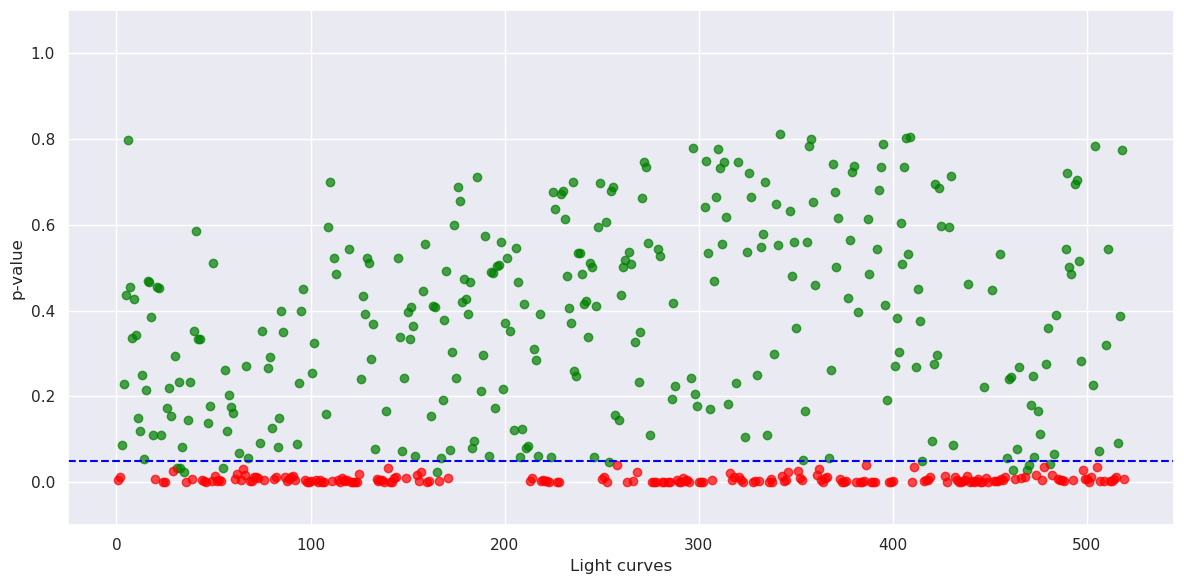

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Configuración de Seaborn
sns.set(style='darkgrid')

# Función para leer los resultados desde un archivo
def leer_resultados(archivo):
    # Leer los datos, asumiendo que están en un archivo delimitado por tabulaciones
    resultados = pd.read_csv(archivo, sep='\t', header=None, names=['Archivo', 'Valor_p', 'Otro', 'Significativo'])
    return resultados

# Función para graficar los resultados
def graficar_resultados(resultados):
    # Convertir el valor p a numérico
    resultados['Valor_p'] = pd.to_numeric(resultados['Valor_p'], errors='coerce')
    
    # Separar las series significativas y no significativas
    significativas = resultados[resultados['Significativo'] == 'Sí']
    no_significativas = resultados[resultados['Significativo'] == 'No']

    # Crear el gráfico
    plt.figure(figsize=(12, 6))
    
    # Graficar las series significativas
    plt.scatter(significativas.index, significativas['Valor_p'], color='green', label='Significativas (p ≤ 0.05)', alpha=0.7)
    
    # Graficar las series no significativas
    plt.scatter(no_significativas.index, no_significativas['Valor_p'], color='red', label='No Significativas (p > 0.05)', alpha=0.7)

    # Configurar el gráfico
    plt.axhline(y=0.05, color='blue', linestyle='--', label='Nivel de Significancia (p = 0.05)')
    plt.ylim(-0.1, 1.1)
#    plt.title('Resultados de la Simulación de Monte Carlo')
    plt.xlabel('Light curves')
    plt.ylabel('p-value')
    #plt.xticks(rotation=45)
   # plt.legend()
    plt.grid(True)

    
    # Guardar el gráfico
    plt.tight_layout()
    plt.savefig('images/montecarlo_LS_sample_1.png')
    plt.show()

def main():
    # Leer resultados
    resultados = leer_resultados("resumen_resultados_montecarlo.txt")

    # Graficar los resultados
    graficar_resultados(resultados)

if __name__ == "__main__":
    main()


In [2]:
!tail resumen_resultados_montecarlo.txt

sagA_378345601.dat	9.162e-02	0.000	Sí
sagA_377740801.dat	3.870e-01	0.000	Sí
sagA_377395201.dat	7.751e-01	0.000	Sí
sagA_376099201.dat	7.396e-03	1.000	No

Resumen Estadístico:
Total de series analizadas: 519
Series con periodicidad significativa (p <= 0.05): 305

Conclusión: La mayoría de las series muestran una periodicidad significativa en torno a los 96 minutos, lo que sugiere que esta periodicidad es real y presente en los datos analizados.

# Montecarlo MCMC

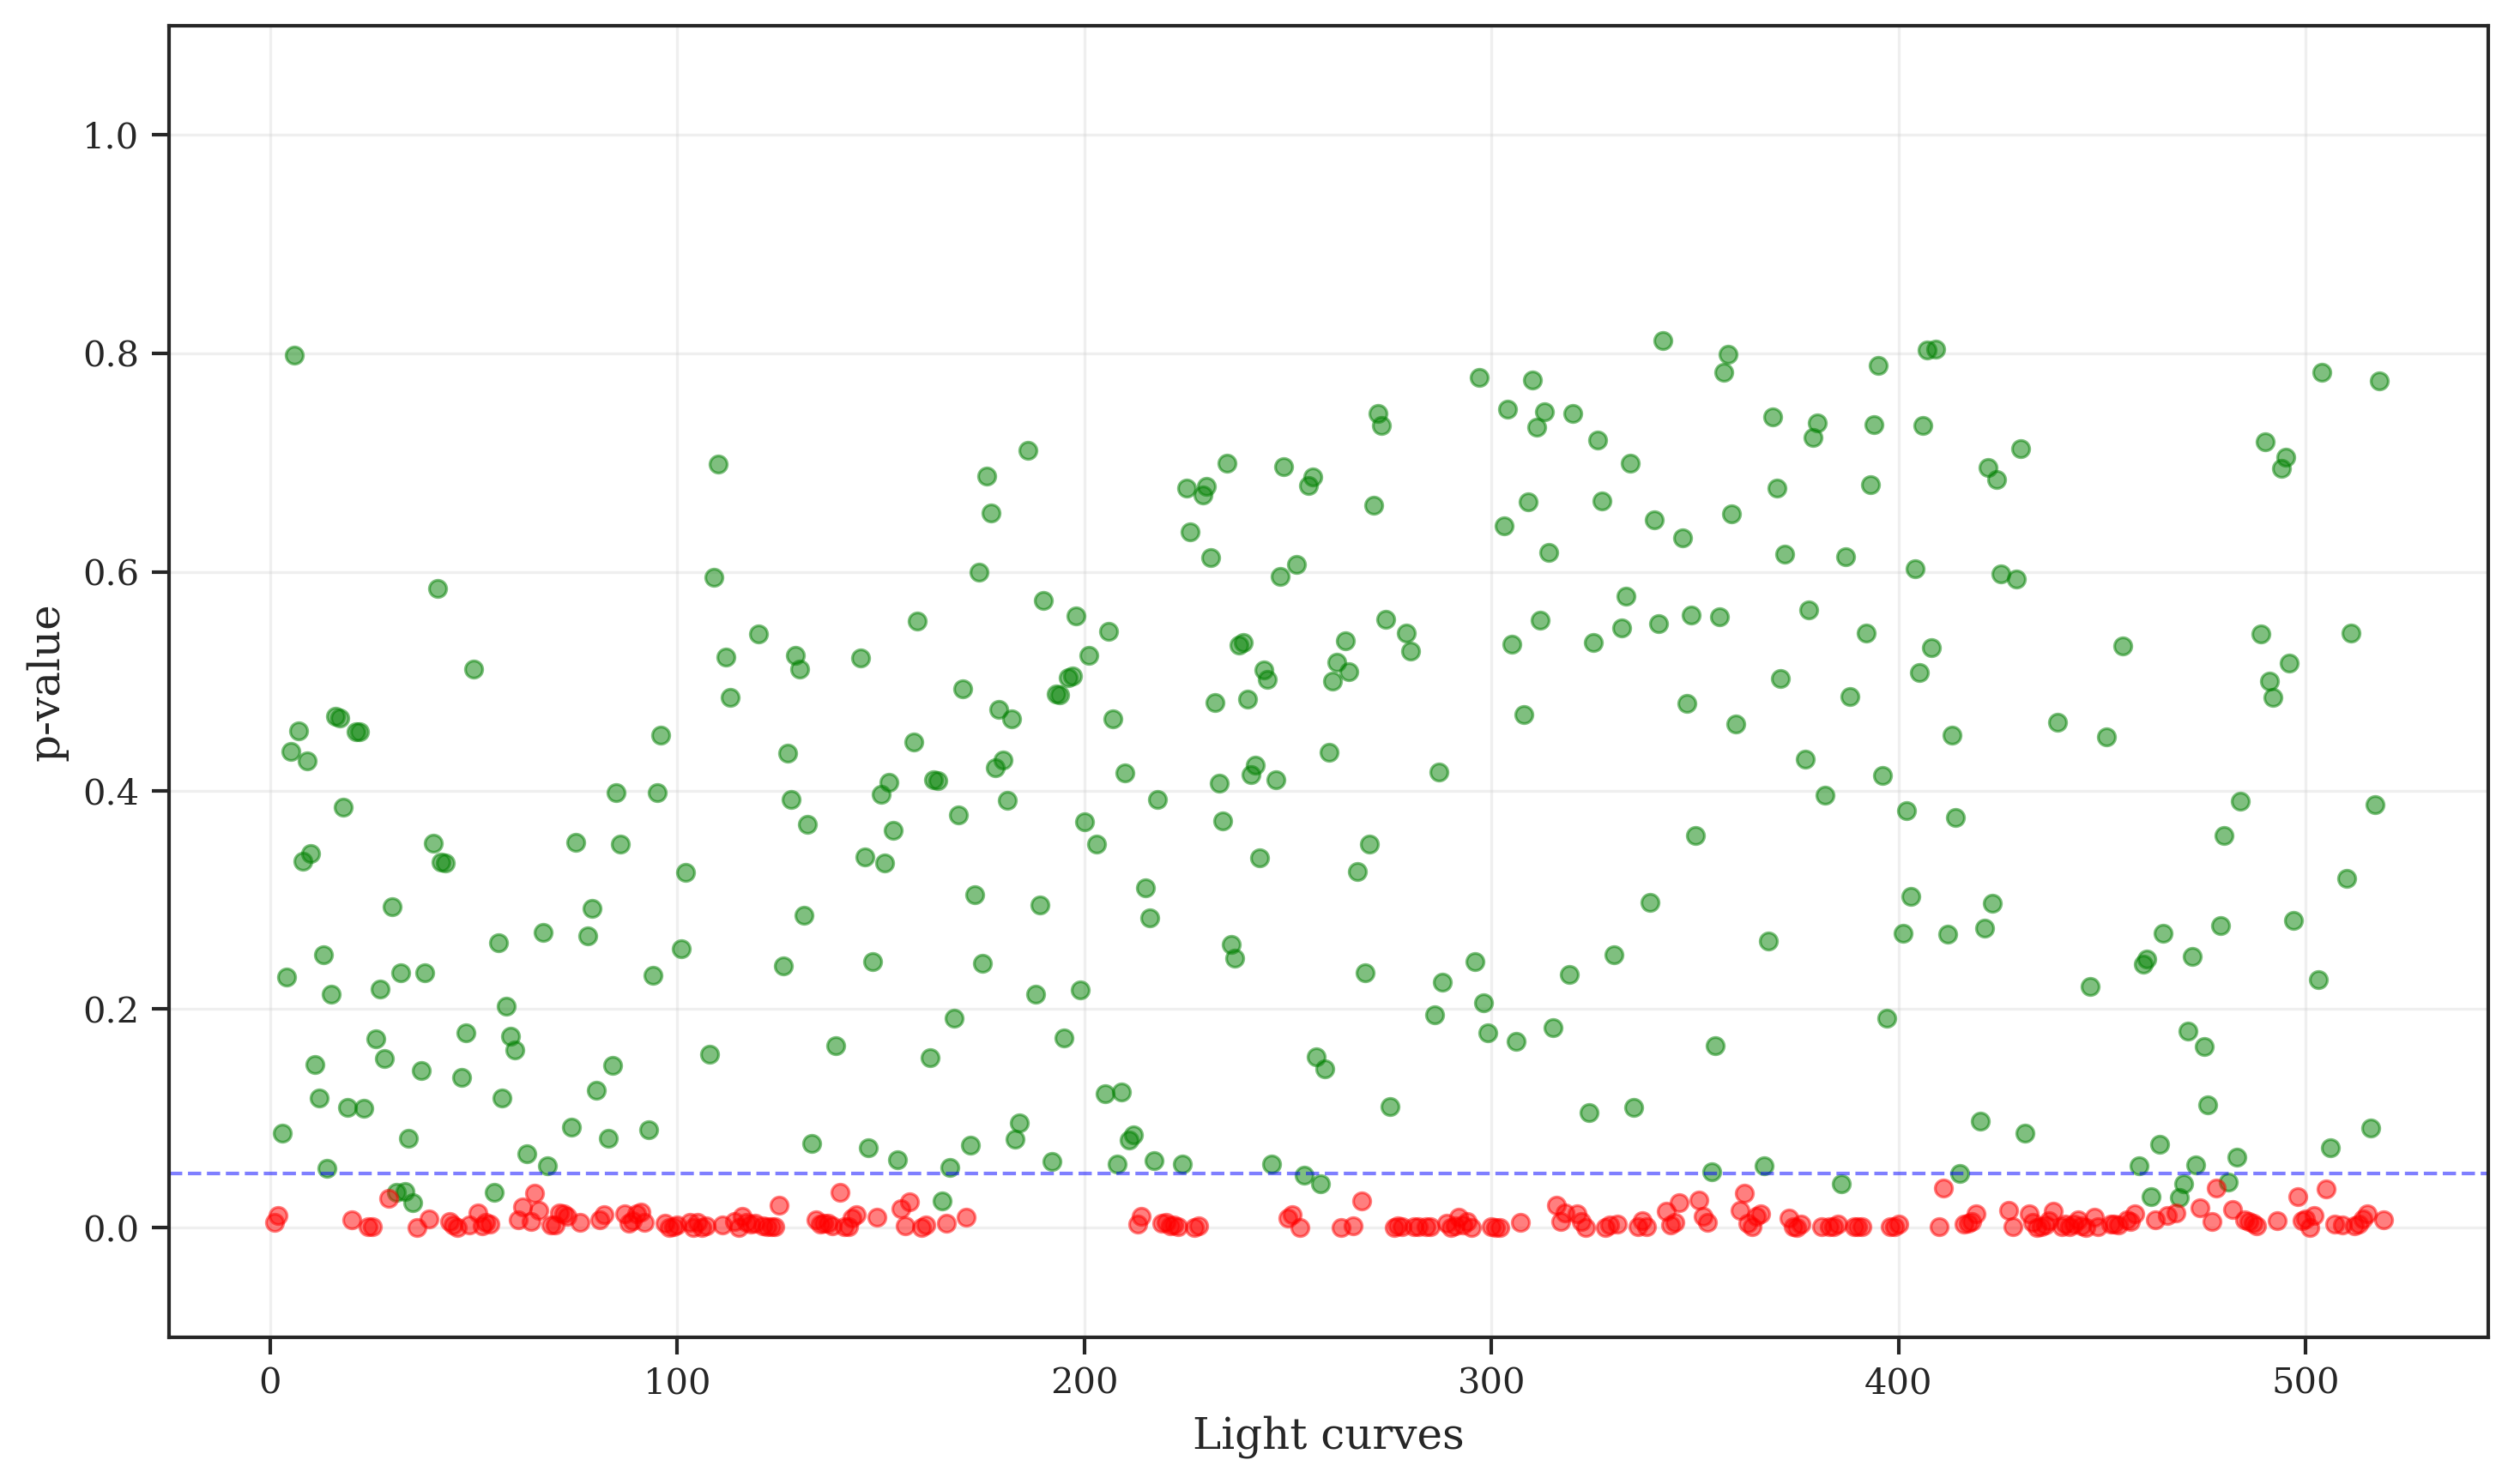

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Configuración avanzada de Seaborn y Matplotlib
sns.set_context("paper", font_scale=1.5)  # Ajuste de tamaño de fuente para publicaciones
sns.set_style("ticks")  # Estilo limpio con ticks visibles
sns.set_palette("muted")  # Paleta de colores suave y profesional

# Configuración adicional de Matplotlib
plt.rcParams.update({
    "axes.titlesize": 14,      # Tamaño de los títulos de los ejes
    "axes.labelsize": 12,      # Tamaño de las etiquetas de los ejes
    "xtick.labelsize": 10,     # Tamaño de las etiquetas del eje X
    "ytick.labelsize": 10,     # Tamaño de las etiquetas del eje Y
    "legend.fontsize": 10,     # Tamaño de la leyenda
    "font.family": "serif",    # Tipo de fuente: preferido en publicaciones científicas
    "figure.dpi": 300,         # Resolución de la figura
    "savefig.dpi": 300,        # Resolución de exportación
    "figure.figsize": (10, 6), # Tamaño de la figura (ajustado)
    "axes.grid": True,         # Activar cuadrícula
    "grid.alpha": 0.3,         # Transparencia de la cuadrícula
    "lines.linewidth": 2,      # Grosor de las líneas
})


# Función para leer los resultados desde un archivo
def leer_resultados(archivo):
    # Leer los datos, asumiendo que están en un archivo delimitado por tabulaciones
    resultados = pd.read_csv(archivo, sep='\t', header=None, names=['Archivo', 'Valor_p', 'Otro', 'Significativo'])
    return resultados

# Función para graficar los resultados
def graficar_resultados(resultados):
    # Convertir el valor p a numérico
    resultados['Valor_p'] = pd.to_numeric(resultados['Valor_p'], errors='coerce')
    
    # Separar las series significativas y no significativas
    significativas = resultados[resultados['Significativo'] == 'Sí']
    no_significativas = resultados[resultados['Significativo'] == 'No']

    # Crear el gráfico
    #plt.figure(figsize=(12, 6))
    
    # Graficar las series significativas
    #plt.scatter(significativas.index, significativas['Valor_p'], color='green', label='Significativas (p ≤ 0.05)', alpha=0.7)
    plt.scatter(significativas.index, significativas['Valor_p'], color='green', alpha=0.5)
    
    # Graficar las series no significativas
    #plt.scatter(no_significativas.index, no_significativas['Valor_p'], color='red', label='No Significativas (p > 0.05)', alpha=0.7)
    plt.scatter(no_significativas.index, no_significativas['Valor_p'], color='red', alpha=0.5)

    # Configurar el gráfico
    #plt.axhline(y=0.05, color='blue', linestyle='--', linewidth=1, alpha=0.5, label='Nivel de Significancia (p = 0.05)')
    plt.axhline(y=0.05, color='blue', linestyle='--', linewidth=1, alpha=0.5)
    plt.ylim(-0.1, 1.1)
    #plt.title('Resultados de la Simulación de Monte Carlo')
    plt.xlabel('Light curves')
    plt.ylabel('p-value')
    #plt.xticks(rotation=45)
    #plt.legend()
    #plt.grid()
    
    # Guardar el gráfico
    plt.tight_layout()
    plt.savefig('images/montecarlo_MCMC_sample_1.pdf', format='pdf',  bbox_inches="tight", dpi=300)
    plt.show()

def main():
    # Leer resultados
    resultados = leer_resultados("resumen_resultados_montecarlo_mcmc.txt")

    # Graficar los resultados
    graficar_resultados(resultados)

if __name__ == "__main__":
    main()


In [4]:
!tail resumen_resultados_montecarlo_mcmc.txt

sagA_378345601.dat	9.162e-02	0.000	Sí
sagA_377740801.dat	3.870e-01	0.000	Sí
sagA_377395201.dat	7.751e-01	0.000	Sí
sagA_376099201.dat	7.396e-03	1.000	No

Resumen Estadístico:
Total de series analizadas: 519
Series con periodicidad significativa (p <= 0.05): 318

Conclusión: La mayoría de las series muestran una periodicidad significativa en torno a los 96 minutos, lo que sugiere que esta periodicidad es real y presente en los datos analizados.